# Лабораторная работа №5

## Задание: 

1. Создать генератор тестовых данных и три выборки - Линейную, Гауссову и 2 пика
2. Реализовать метод Фанзена-Розенблатта
3. С помощью первых двух методов восстановить данные
4. Для одного из 3 наборов применить оптимизацию ширины окна методом LOO
5. Для сгенерированных данных с двумя пиками применить ЕМ алгоритм из sklearn
6. Напечатать полученные параметры распределения, нарисовать функции

In [2]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

### Равномерное распределение: $$F(x) = \frac{x-a}{b-a}$$

In [12]:
def linear(a=0, b=1):
    return random.random() * (b-a)+a

def LinearData(n):
    x = []
    for i in range (n):
        x.append(linear())
    return x

LinearData(12)

[0.21256010051754548,
 0.9017778463843387,
 0.6809876742857582,
 0.01550442514099637,
 0.8524642652197455,
 0.8676115063200035,
 0.17304786304521458,
 0.017571400168080897,
 0.5442168197082423,
 0.22304711176329894,
 0.06198240425284496,
 0.14687501701422]

### Гауссово распределение: $$F(x) = \frac{1}{2}\left\[1+erf\frac{x-\mu}{\sqrt{2*\sigma^2}}\right\]\$$

In [9]:
def gauss(m=0, d=1):
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return d * (12/n)**(1/2) * (x - n/2) + m

def GaussData(n):
    x = []
    for i in range (n):
        x.append(gauss())
    return x

GaussData(12)

[-1.7779584663062433,
 1.2560715099627142,
 0.1895508470144609,
 0.7662731854852325,
 0.8477657694643614,
 1.6453854391944667,
 0.5036819751176829,
 -0.8451439846265734,
 -0.680986963162515,
 -1.5637400845105045,
 -1.184179992461316,
 1.3808270941733722]

### Два пика (2 нормальных распределения с разными параметрами)

In [11]:
def TwoPeaksData(N,m1=-4,d1=2,m2=3,d2=6):
    x = []
    for i in range(N):
        r = linear()
        if r > 0.5:
            x.append(gauss(m1,d1))
        else:
            x.append(gauss(m2,d2))
    return x

TwoPeaksData(12)

[0.4958865160337904,
 -3.8640764607228792,
 0.5833927077860324,
 -3.479318098195069,
 -3.693171303450889,
 2.40271480948533,
 0.3104157236969982,
 6.2386606021121676,
 -1.750278594514917,
 13.891846202208383,
 -6.086646467965133,
 -5.055812962051055]

### Модель Парзена-Розенблатта

In [13]:
def gauss_kernel(r):
     return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (r**2))
    
def ParzRozen(x, data, h):
    rez = 0
    for i in data:
        rez = rez + gauss_kernel((x - i)/h)
    return rez / (len(data)*h)

### Восстановление областей

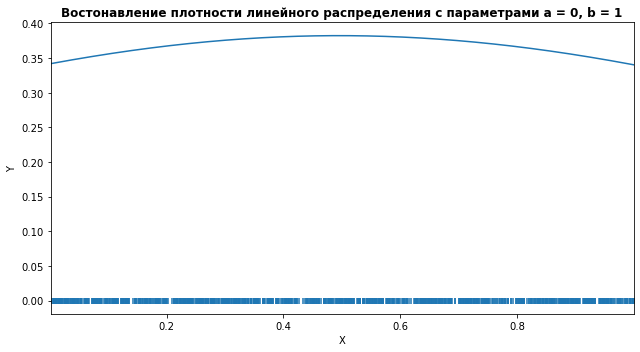

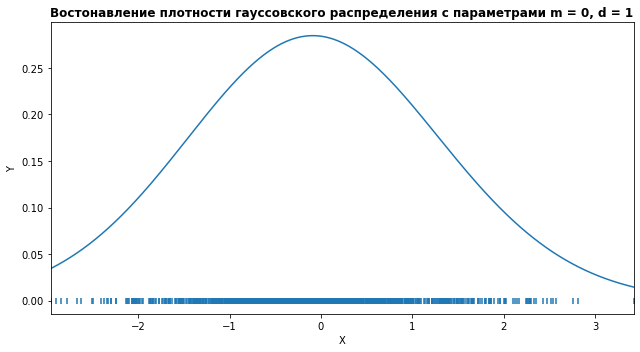

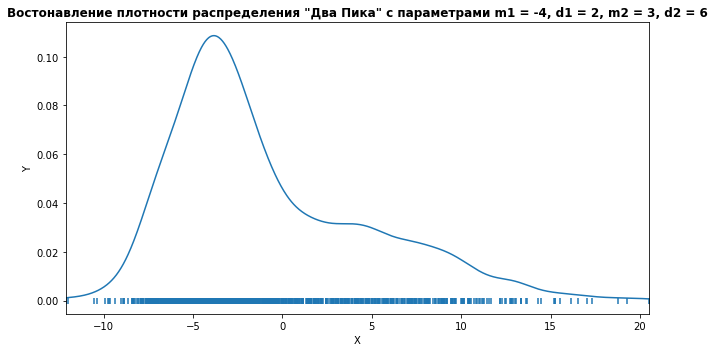

In [14]:
grid_points = 1000
lin_dat = LinearData(grid_points)
ld_min = min(lin_dat)
ld_max = max(lin_dat)
x = np.linspace(ld_min, ld_max, grid_points)

points = np.zeros((1000))

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, lin_dat, h=1))
ax.scatter(lin_dat,points, marker = "|")

ax.set_xlim((ld_min, ld_max))
ax.set_title('Востонавление плотности линейного распределения с параметрами a = 0, b = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

#для второго генератора
gau_dat = GaussData(grid_points)
gau_min = min(gau_dat)
gau_max = max(gau_dat)
x = np.linspace(gau_min, gau_max, grid_points)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, gau_dat, h=1))
ax.scatter(gau_dat,points, marker = "|")

ax.set_xlim((gau_min, gau_max))
ax.set_title('Востонавление плотности гауссовского распределения с параметрами m = 0, d = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

#для третьего генератора
tp_dat = TwoPeaksData(grid_points)
tp_min = min(tp_dat)
tp_max = max(tp_dat)
x = np.linspace(tp_min, tp_max, grid_points)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=1))
ax.scatter(tp_dat,points, marker = "|")

ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -4, d1 = 2, m2 = 3, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

### Leave One Out (LOO) $$LOO(h) = -\sum_{i = 1}^{l}ln p_h(x_i; X^l/x_i) -> min_h$$

In [17]:
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzRozen(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении h=10: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении h=10: 3469.1539066626738


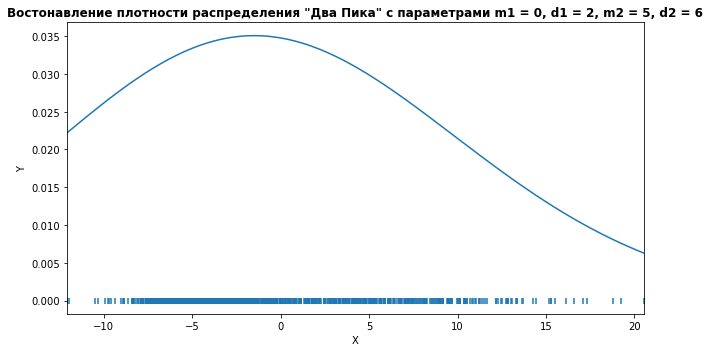

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=10))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

In [19]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 509.22002034515884


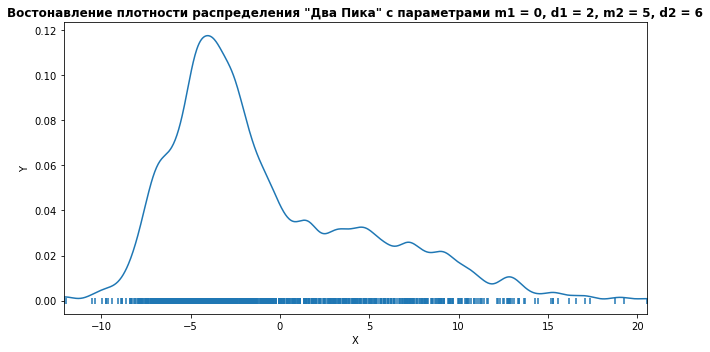

In [20]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

### EM-алгоритм для Двух Пиков 

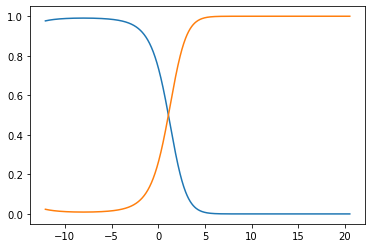

In [21]:
from sklearn.mixture import GaussianMixture
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()